In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
%matplotlib inline
np.random.seed(27)
rcParams['figure.figsize'] = 10, 6
warnings.filterwarnings('ignore')
sns.set(style="darkgrid")

In [3]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass

In [4]:
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/creditcard.csv')

In [8]:
df.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
47747,43343.0,1.209971,-0.158081,0.685984,-0.019681,-0.874075,-0.775662,-0.352771,0.015835,0.545579,-0.224426,0.088800,-0.203061,-1.113465,0.410833,1.607339,0.072905,0.100539,-0.831441,-0.446510,-0.176492,-0.096262,-0.294659,0.177728,0.418381,-0.039814,0.918010,-0.061961,0.007276,5.37,0
225706,144357.0,0.107350,0.718755,-0.059117,-0.821294,0.716260,-1.189281,1.338169,-0.395374,-0.185327,-0.841789,-0.908705,0.633981,0.905077,0.104062,-0.451994,-0.476546,-0.429700,-0.639710,0.121597,-0.059895,-0.043964,-0.030030,-0.042275,-0.078641,-0.157494,-0.150633,0.019411,0.036256,31.00,0
255432,157223.0,-0.992778,1.374399,-1.681843,-0.123910,0.711935,-1.394937,2.114597,-0.066849,-0.815940,-2.754625,0.025988,-0.054213,0.620262,-2.687384,0.243924,0.504939,2.327616,1.282721,-0.635943,0.364793,0.196423,0.220383,0.131703,-0.358277,0.402663,-0.552094,-0.015239,0.170879,231.05,0
202435,134327.0,2.084975,-1.678690,-0.492561,-1.592379,-1.541775,-0.284969,-1.310430,-0.051357,-1.320674,1.630477,0.589819,0.279823,1.195581,-0.541423,-0.680839,0.018269,-0.023405,0.356297,0.236777,-0.202740,-0.315913,-0.614923,0.334403,-0.383453,-0.604302,-0.494455,0.023015,-0.032347,95.94,0
119363,75422.0,1.176209,0.183813,0.514542,0.450080,-0.197021,-0.187294,-0.091779,0.056852,-0.280994,0.047212,1.773171,1.363238,0.625851,0.381332,0.537814,0.187727,-0.419805,-0.546371,-0.189620,-0.088922,-0.173952,-0.483480,0.149046,0.023991,0.129106,0.105646,-0.013529,0.006163,0.99,0
278025,167999.0,-1.156907,1.420744,-0.147273,-0.466291,0.776343,-0.570537,0.578796,0.300638,-0.302351,-1.067851,-0.752718,0.218274,0.770489,-1.134082,-0.063527,0.424923,0.582142,0.184803,-0.387181,-0.096968,-0.011317,0.066315,0.001018,0.541612,-0.007804,0.220533,-0.000502,0.142216,3.15,0
36841,38707.0,0.785444,-0.597222,0.605561,1.244619,-0.622756,0.315559,-0.254002,0.154470,0.485267,-0.109619,-0.794097,-0.246940,-0.428476,0.219492,1.717808,0.523656,-0.538191,0.028283,-0.837157,0.235017,0.124869,-0.076397,-0.178626,-0.483995,0.226201,-0.389716,0.027125,0.064156,210.00,0
2897,2440.0,-4.508547,5.050932,-2.114599,0.265771,1.263230,0.474670,-3.704011,-12.668590,0.344009,-0.674270,0.991243,0.826888,-0.233163,-3.089463,0.263483,0.806294,3.855011,0.981090,-2.197613,-2.574071,12.194849,-4.266839,0.500497,-0.100951,-0.265935,-0.472904,1.055836,0.504921,2.29,0
209168,137440.0,-0.669346,0.911977,1.573321,0.085886,0.328298,0.123796,0.833307,-0.070630,0.045147,-0.980685,-0.768544,1.158238,1.064611,-0.601892,-1.212480,-1.701812,0.798115,-1.051274,1.673842,0.096466,-0.295969,-0.505125,-0.307069,1.149803,0.610874,-0.108791,-0.050923,0.063238,16.72,0
164732,116951.0,-1.567896,0.221627,1.263914,1.589267,-1.127205,0.460612,-0.853595,1.085444,0.586145,-0.936012,-1.857182,0.871812,0.550898,-0.302934,-0.910432,-0.379791,0.493669,0.194899,0.761313,-0.191527,0.190115,0.626447,0.140682,0.011337,-0.652499,-0.585848,0.025916,-0.090032,60.00,0


In [9]:
target = 'Class'

In [10]:
X = df.loc[:, df.columns!=target]

In [11]:
Y = df.loc[:, df.columns==target]

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.33, 
                                                    random_state=42)

0    284315
1       492
Name: Class, dtype: int64


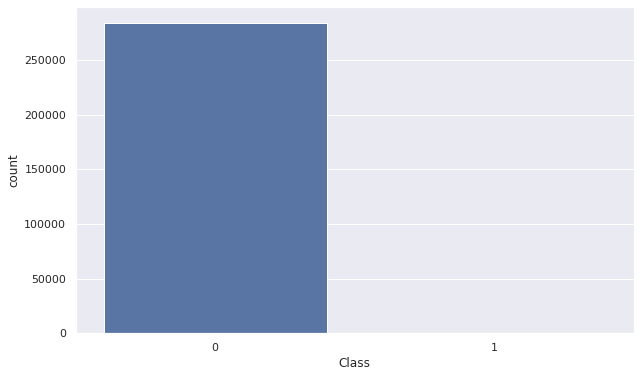

In [13]:
ax = sns.countplot(x=target, data=df)
print(df[target].value_counts())

In [14]:
100* (492/float(df.shape[0]))

0.1727485630620034

In [15]:
100* (284315/float(df.shape[0]))

99.82725143693798

In [16]:
Y_train[target].value_counts()

0    190477
1       343
Name: Class, dtype: int64

In [17]:
clf = LogisticRegression().fit(X_train, Y_train)

In [18]:
Y_Test_Pred = clf.predict(X_test)

In [19]:
pd.crosstab(Y_Test_Pred, Y_test[target], rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,93792,57
1,46,92


In [20]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.9989041037590305
Precision =  0.6666666666666666
Recall =  0.6174496644295302
F1 Score =  0.6411149825783973


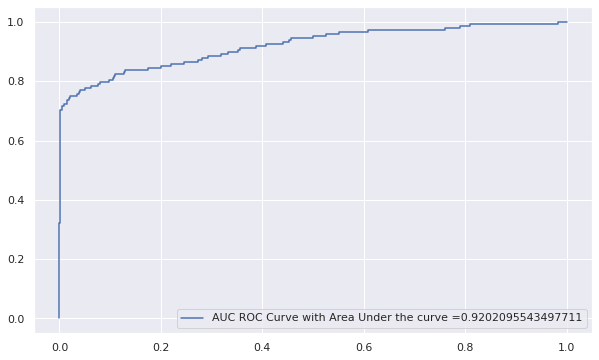

In [21]:
generate_auc_roc_curve(clf, X_test)

# class_weight='balanced'

<img src="https://github.com/bhattbhavesh91/imbalance_class_sklearn/blob/master/class_weight_inp_image.png?raw=1">

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.utils.class_weight.compute_class_weight.html

In [22]:
unique_classes = list(df[target].unique())
unique_classes

[0, 1]

In [23]:
out_dict = {}
for classes in unique_classes:
    out_dict[classes] = df.shape[0]/((df.loc[df[target] == classes].shape[0])
                                     *len(unique_classes))

In [24]:
out_dict

{0: 0.5008652375006595, 1: 289.4380081300813}

In [25]:
print (X_train.shape, Y_train.shape)

(190820, 30) (190820, 1)


In [26]:
clf = LogisticRegression(class_weight='balanced').fit(X_train, Y_train)

In [27]:
from sklearn.utils import class_weight #IT would compute the weights

In [28]:
class_weight.compute_class_weight('balanced', np.unique(Y_train), Y_train[target])

array([  0.50090037, 278.16326531])

In [29]:
Y_Test_Pred = clf.predict(X_test)

In [30]:
pd.crosstab(Y_Test_Pred, Y_test[target], rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,90719,12
1,3119,137


In [31]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.9666868822283933
Precision =  0.04207616707616708
Recall =  0.9194630872483222
F1 Score =  0.08046989720998532


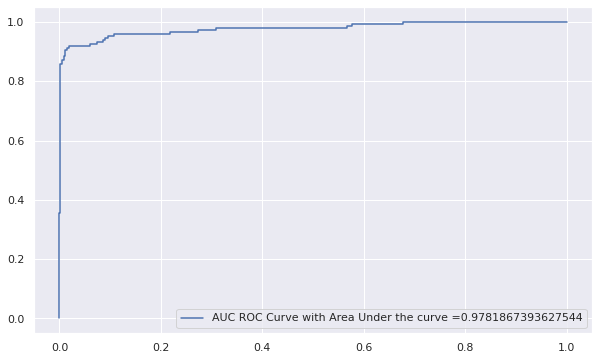

In [32]:
generate_auc_roc_curve(clf, X_test)

In [33]:
weights = np.linspace(0.05, 0.95, 20)
gsc = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={
        'class_weight': [{0: x, 1: 1.0-x} for x in weights]
    },
    scoring='f1',
    cv=5
)

grid_result = gsc.fit(X_train, Y_train)
print("Best parameters : %s" % grid_result.best_params_)

Best parameters : {'class_weight': {0: 0.28684210526315784, 1: 0.7131578947368422}}


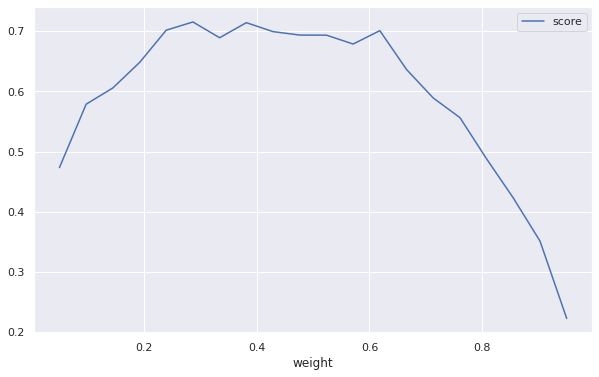

In [34]:
data_out = pd.DataFrame({'score': grid_result.cv_results_['mean_test_score'],
                       'weight': weights })
data_out.plot(x='weight')

In [35]:
data_out

,score,weight
0,0.473492,0.050000
1,0.578800,0.097368
2,0.605815,0.144737
3,0.648032,0.192105
4,0.701782,0.239474
5,0.715410,0.286842
6,0.689225,0.334211
7,0.714252,0.381579
8,0.699367,0.428947
9,0.693621,0.476316


In [36]:
clf = LogisticRegression(**grid_result.best_params_).fit(X_train, Y_train)

In [37]:
Y_Test_Pred = clf.predict(X_test)

In [38]:
pd.crosstab(Y_Test_Pred, Y_test[target], rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,93767,37
1,71,112


In [39]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.9988509049123815
Precision =  0.6120218579234973
Recall =  0.7516778523489933
F1 Score =  0.674698795180723


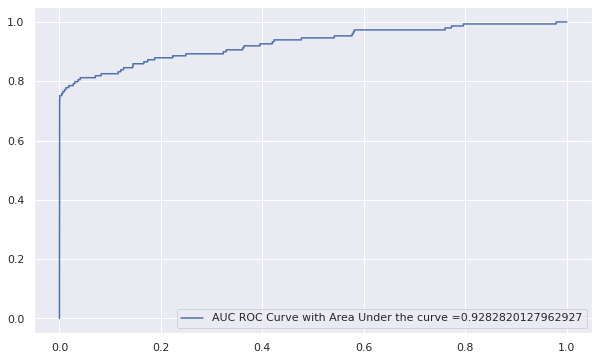

In [40]:
generate_auc_roc_curve(clf, X_test)

# SMOTE

In [41]:
unique, count = np.unique(Y_train, return_counts=True)
Y_train_dict_value_count = { k:v for (k,v) in zip(unique, count)}
Y_train_dict_value_count

{0: 190477, 1: 343}

In [42]:
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(X_train, Y_train)

In [43]:
unique, count = np.unique(y_train_res, return_counts=True)
y_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}
y_train_smote_value_count

{0: 190477, 1: 190477}

In [44]:
clf = LogisticRegression().fit(x_train_res, y_train_res)

In [45]:
Y_Test_Pred = clf.predict(X_test)

In [46]:
pd.crosstab(Y_Test_Pred, Y_test[target], rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,92200,15
1,1638,134


In [47]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.9824124612978391
Precision =  0.07562076749435666
Recall =  0.8993288590604027
F1 Score =  0.13951067152524727


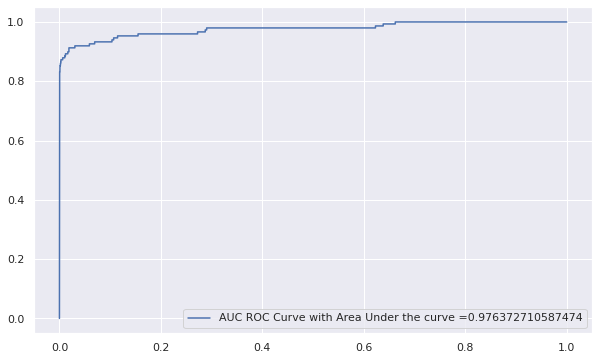

In [48]:
generate_auc_roc_curve(clf, X_test)

In [49]:
weights = np.linspace(0.005, 0.25, 10)
weights

array([0.005     , 0.03222222, 0.05944444, 0.08666667, 0.11388889,
       0.14111111, 0.16833333, 0.19555556, 0.22277778, 0.25      ])

Best parameters : {'smote__ratio': 0.005}


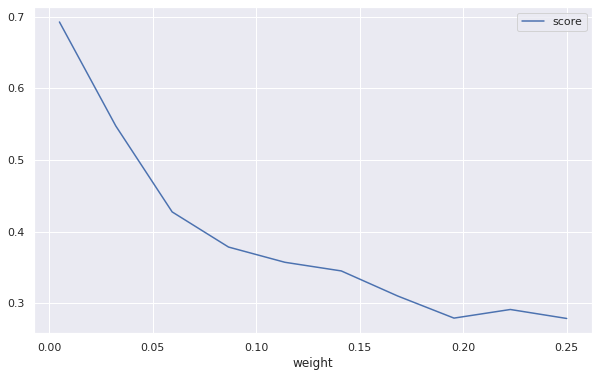

In [50]:
pipe = make_pipeline(
    SMOTE(),
    LogisticRegression()
)

weights = np.linspace(0.005, 0.25, 10)

gsc = GridSearchCV(
    estimator=pipe,
    param_grid={
        'smote__ratio': weights
    },
    scoring='f1',
    cv=3
)
grid_result = gsc.fit(X_train, Y_train)

print("Best parameters : %s" % grid_result.best_params_)
weight_f1_score_df = pd.DataFrame({ 'score': grid_result.cv_results_['mean_test_score'],
                                   'weight': weights })
weight_f1_score_df.plot(x='weight')

In [51]:
pipe = make_pipeline(
    SMOTE(ratio=0.005),
    LogisticRegression()
)

pipe.fit(X_train, Y_train)

Y_Test_Pred = pipe.predict(X_test)

In [52]:
pd.crosstab(Y_Test_Pred, Y_test[target], 
            rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,93774,43
1,64,106


In [53]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.9988615446817113
Precision =  0.6235294117647059
Recall =  0.7114093959731543
F1 Score =  0.6645768025078369


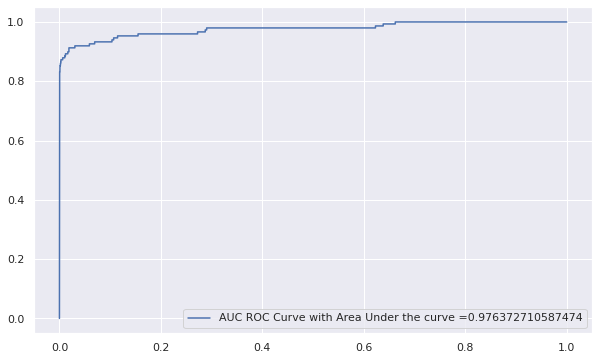

In [54]:
generate_auc_roc_curve(clf, X_test)

# UNDERSAMPLING

In [55]:
minority_class_len = len(df[df[target] == 1])
print(minority_class_len)

492


In [56]:
majority_class_indices = df[df[target] == 0].index
print(majority_class_indices)

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            284797, 284798, 284799, 284800, 284801, 284802, 284803, 284804,
            284805, 284806],
           dtype='int64', length=284315)


In [57]:
random_majority_indices = np.random.choice(majority_class_indices,
                                           minority_class_len, 
                                           replace=False)
print(len(random_majority_indices))

492


In [58]:
minority_class_indices = df[df[target] == 1].index
print(minority_class_indices)

Int64Index([   541,    623,   4920,   6108,   6329,   6331,   6334,   6336,
              6338,   6427,
            ...
            274382, 274475, 275992, 276071, 276864, 279863, 280143, 280149,
            281144, 281674],
           dtype='int64', length=492)


In [59]:
under_sample_indices = np.concatenate([minority_class_indices,random_majority_indices])

In [60]:
under_sample = df.loc[under_sample_indices]

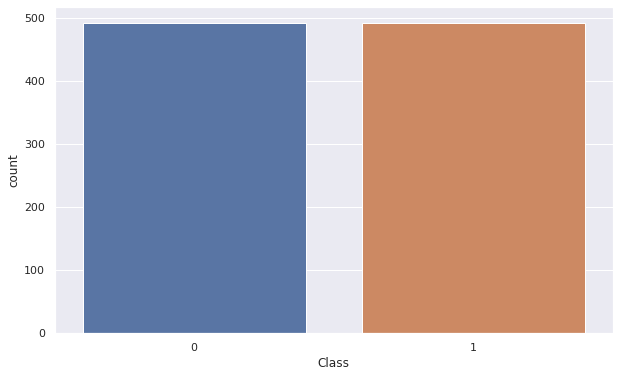

In [61]:
sns.countplot(x=target, data=under_sample)

In [62]:
X = under_sample.loc[:, df.columns!=target]
Y = under_sample.loc[:, df.columns==target]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
clf = LogisticRegression().fit(X_train, Y_train)
Y_Test_Pred = clf.predict(X_test)

In [63]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.92
Precision =  0.9726027397260274
Recall =  0.8658536585365854
F1 Score =  0.9161290322580644


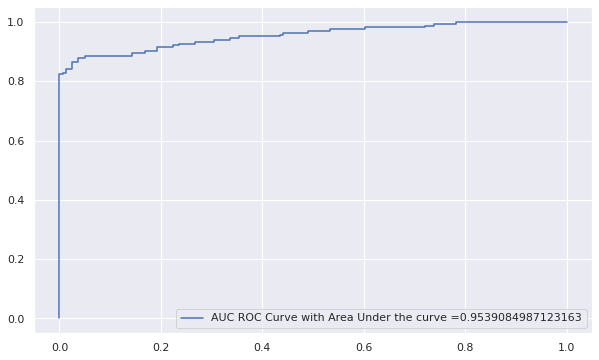

In [64]:
generate_auc_roc_curve(clf, X_test)